In [1]:
%load_ext autoreload
%autoreload 2

import sys  
sys.path.insert(0, 'functions')
sys.path.insert(0, 'training')

In [2]:
from Clusterer import *
from plotting import *
from data_functions import *

### This notebook should remain unchanged, with the exception of editing the values in the cell directly below

In [3]:
#root_file = "hcal_pi+_0-110GeVLinear_17degFixed.root"
#root_file = "hcalInsert_pi+_0-100GeVLinear.root"


#label = "HCal_0-110GeVLinear_17degFixed"
#label = "Insert_0-100GeVLinear"
label ="HCal_0-60GeVLogUniform20n20deg"


detector_name = "HcalEndcapPHitsReco" #or "HcalEndcapPInsertHitsReco"
sampling_fraction = 0.02 #or 0.0098

#detector_name = "HcalEndcapPInsertHitsReco"
#sampling_fraction = 0.0098

NEvents_Max = 1_000_000 #OK if tree has less events than this
Energy_Bins = binning=np.linspace(0.1,110,21) #Plotting

Do_Processing = False
Do_Training = False
#saves to path/numpy_file. Only needs to be run frist time. 
# Change to False for messing with plots

In [4]:
if Do_Processing:
    Clusterer = Strawman_Clusterer(root_file, label, detector_name, sampling_fraction, NEvents_Max)
    Clusterer.run_clusterer()
    del Clusterer
#Ignore: " DeprecationWarning: `np.str` "

### Load Strawman (cluster sum) and Generated Data

In [5]:
ClusterSum, GenP = load_ClusterSum_and_GenP(label)

#### Plot Energy Distributions

Plotting QA Distributions...


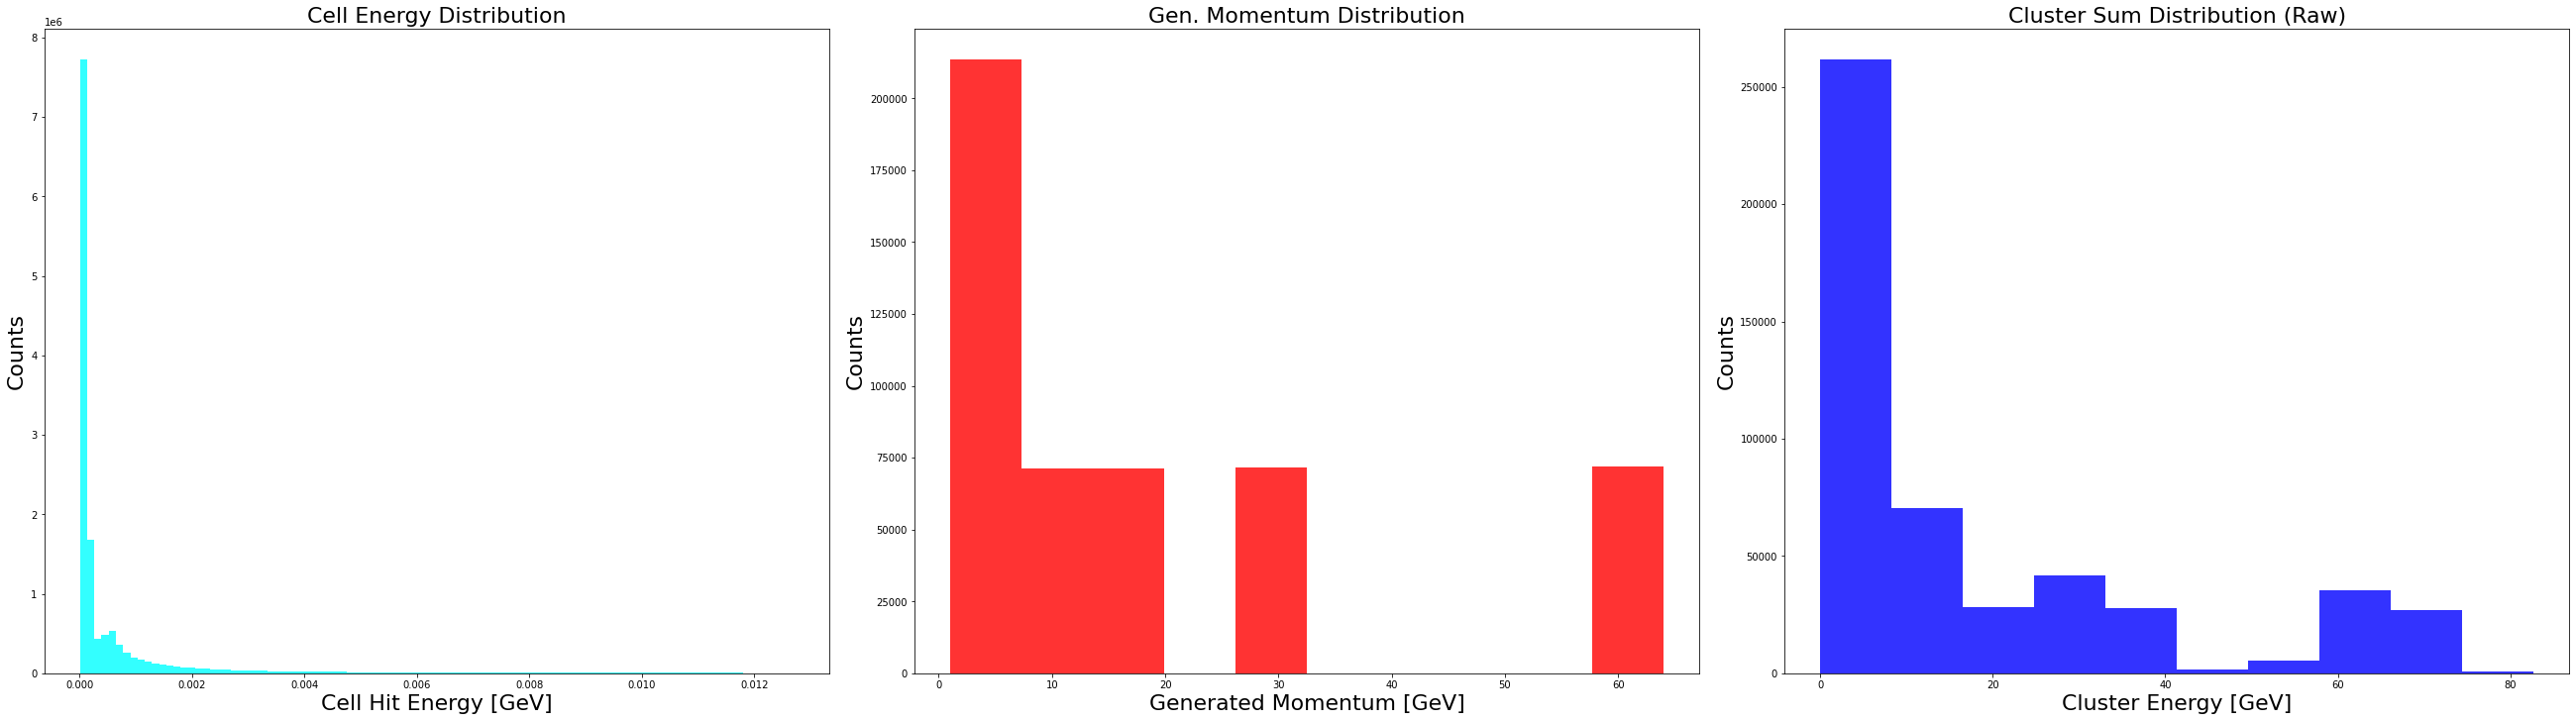

In [6]:
flat_hits_e = load_flat_hits_e(label)
energy_QA_plots(flat_hits_e, GenP, ClusterSum, label)

#### Plot Clusters vs Generated

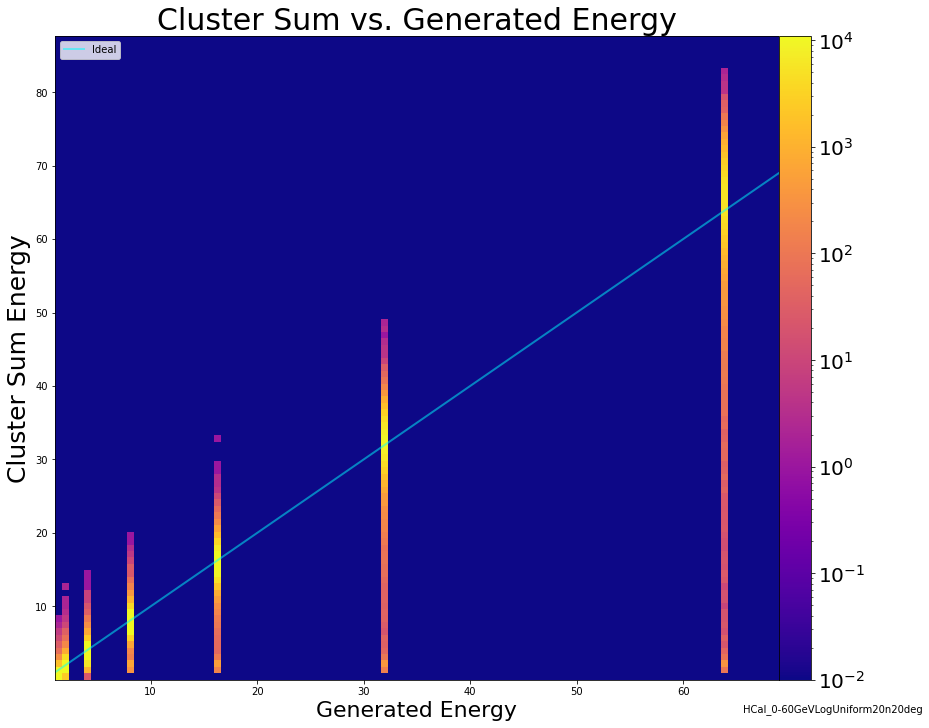

In [7]:
ClusterSum_vs_GenP(ClusterSum, GenP, label)

In [8]:
from NN_Regression import *

In [9]:
NN_Regression = NN_Regressor(label)

In [10]:
if (Do_Training):
    NN_Regression.run_NN_regression()

In [11]:
x_test = np.load(f"./{label}/x_test.npy")
y_test = np.load(f"./{label}/y_test.npy")
preds = np.load(f"./{label}/predictions.npy")
loss = np.load(f"./{label}/loss.npy")
val_loss = np.load(f"./{label}/val_loss.npy")

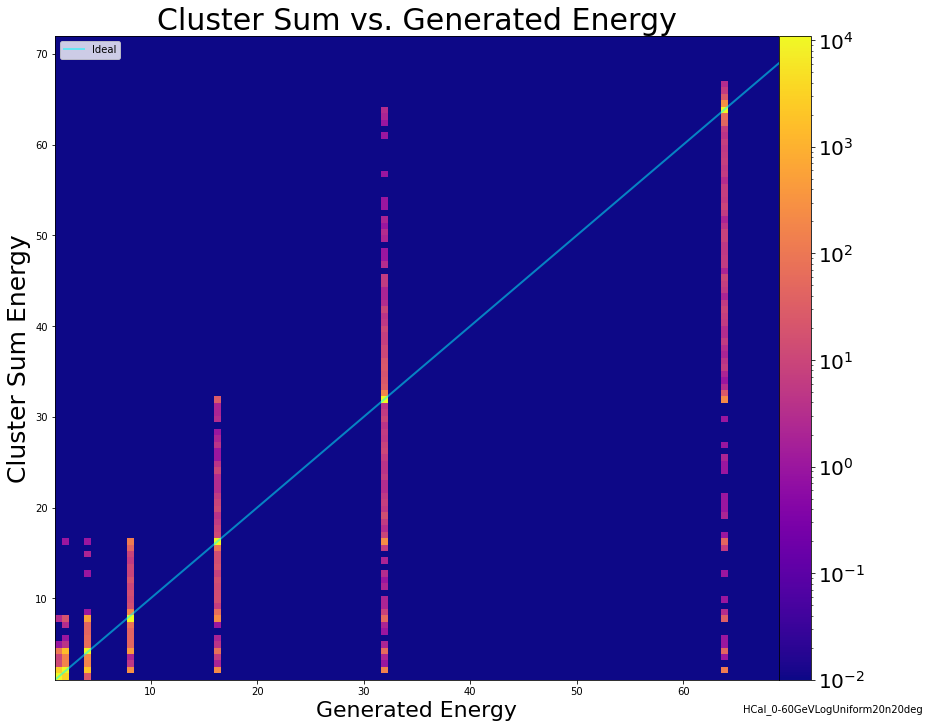

In [12]:
ClusterSum_vs_GenP(preds[:,0],y_test,label)

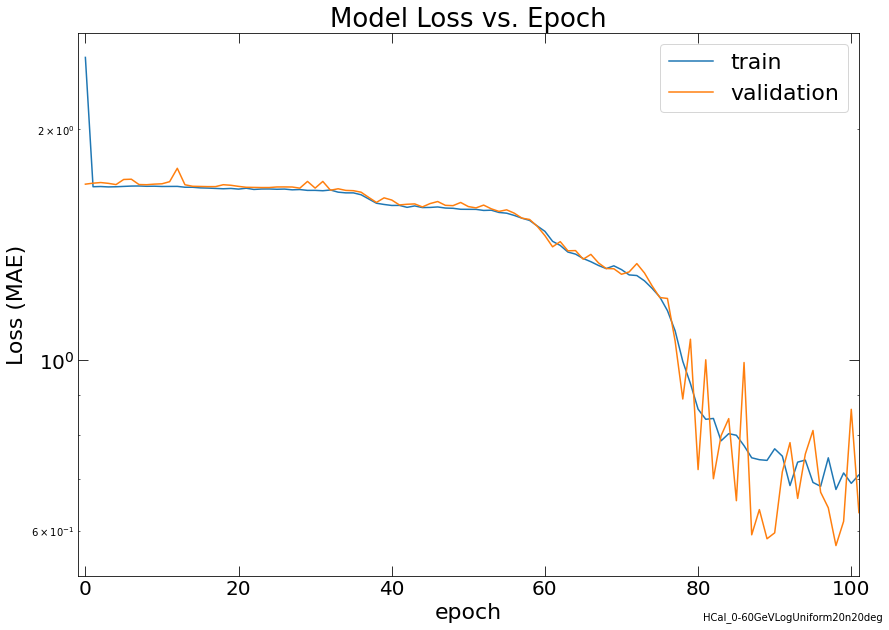

In [13]:
Plot_Loss_Curve(loss,val_loss,label,loss_string="MAE") #label loss yourself here

## Get Dictionaries with Resolution, Scale, and distributions

In [14]:
NN = get_res_scale(y_test,preds,binning=np.linspace(0.1,110,21))
strawman = get_res_scale(y_test,x_test,binning=np.linspace(0.1,110,21))

NN_in_RecoBins = get_res_scale_in_reco_bins(y_test,preds,x_test,binning=np.linspace(0.1,110,21))
strawman_in_RecoBins = get_res_scale_in_reco_bins(y_test,x_test,x_test,binning=np.linspace(0.1,110,21))

print(NN.keys())
print(NN_in_RecoBins.keys())

/clusterfs/ml4hep_nvme2/ftoralesacosta/regressiononly/functions/data_functions.py:70: RuntimeWarning: invalid value encountered in true_divide
  avg_truth = avg_truth/counter
/global/home/users/ftoralesacosta/anaconda3/envs/tin/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/clusterfs/ml4hep_nvme2/ftoralesacosta/regressiononly/functions/data_functions.py:75: RuntimeWarning: Mean of empty slice
  avg_scale  =   np.nanmean(scale_array,axis=-1)
/global/home/users/ftoralesacosta/anaconda3/envs/tin/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:997: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/clusterfs/ml4hep_nvme2/ftoralesacosta/regressiononly/functions/data_functions.py:128: RuntimeWarning: invalid value encountered in true_divide
  avg_reco = avg_reco/counter
/clusterfs/ml4hep_nvme2/ftora

dict_keys(['avg_truth', 'resolution', 'median_scale', 'avg_scale', 'slices', 'scale_array'])
dict_keys(['avg_reco', 'avg_truth', 'resolution', 'median_scale', 'avg_scale', 'slices', 'scale_array'])


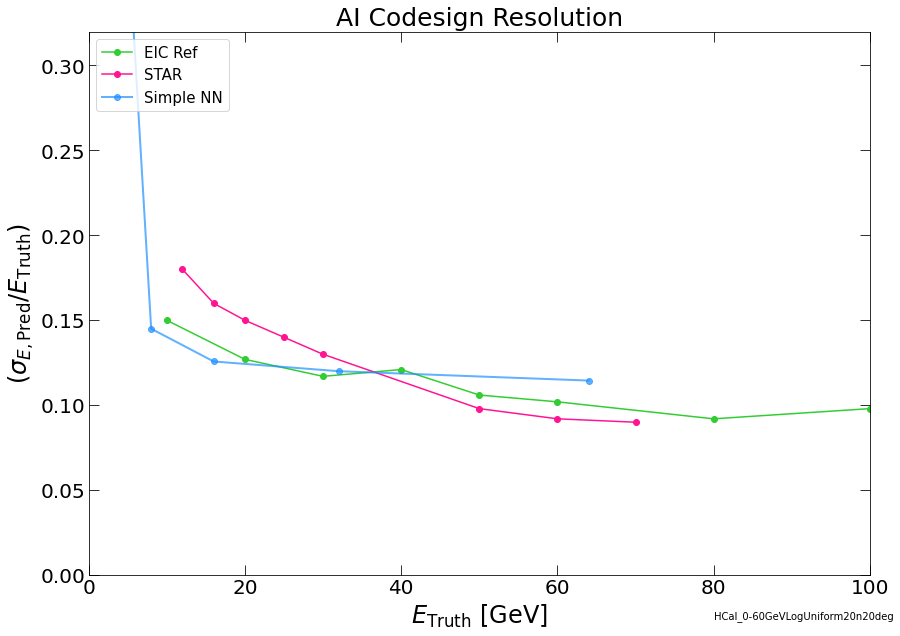

In [15]:
Plot_Resolutions(NN,strawman,label)

[ 2.33265578  7.99999982 15.99999963 31.99999928 63.99999856]
[1.01535654 1.00468785 1.00762665 0.99796867 0.99702704]
[ 2.12142167  7.91041675 14.94802522 17.88695388 25.65891385 30.96583289
 34.84871524 40.49872004 47.16194406 52.70350437 58.44773489 63.62555924
 68.30662994 73.0818706  78.33904641]
[1.01494443 1.00478053 1.00768387 1.00688201 0.99910676 0.99787593
 0.99807525 1.02499199 0.99500036 0.99820247 0.99614543 0.99633253
 0.99803439 1.00100327 1.0205406 ]


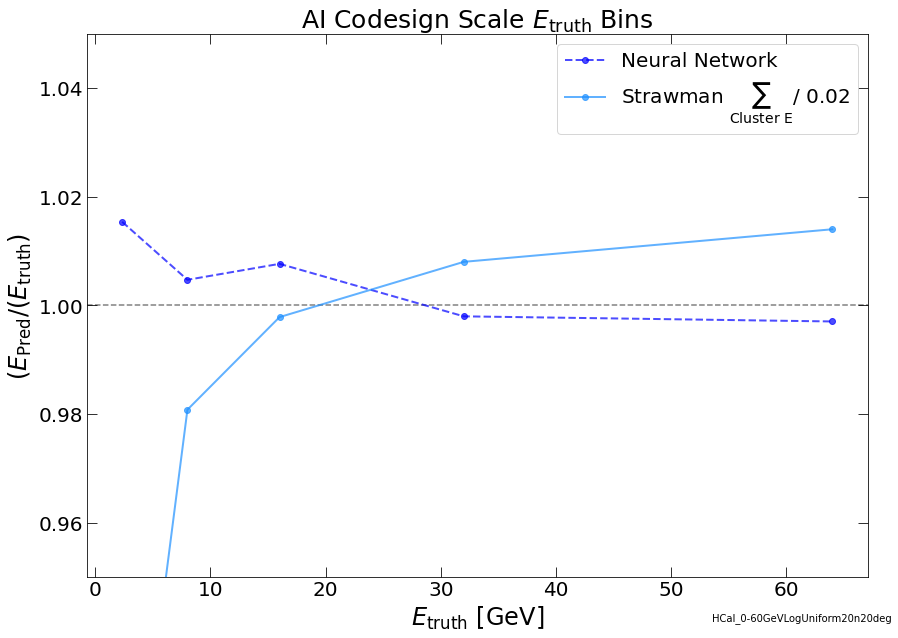

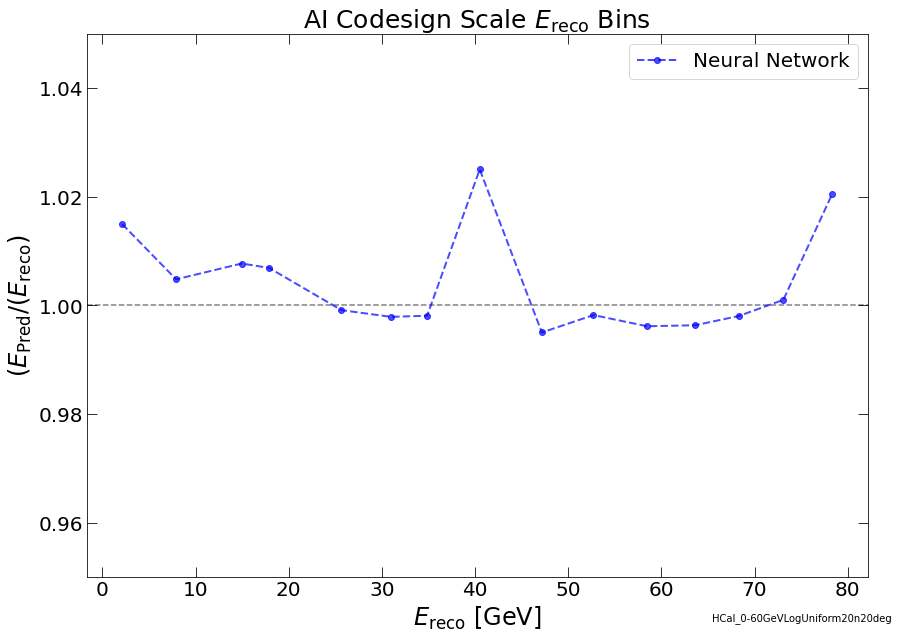

In [16]:
Plot_Energy_Scale(NN,label,sampling_fraction,strawman)
Plot_Energy_Scale(NN_in_RecoBins,label,sampling_fraction,None,"reco")

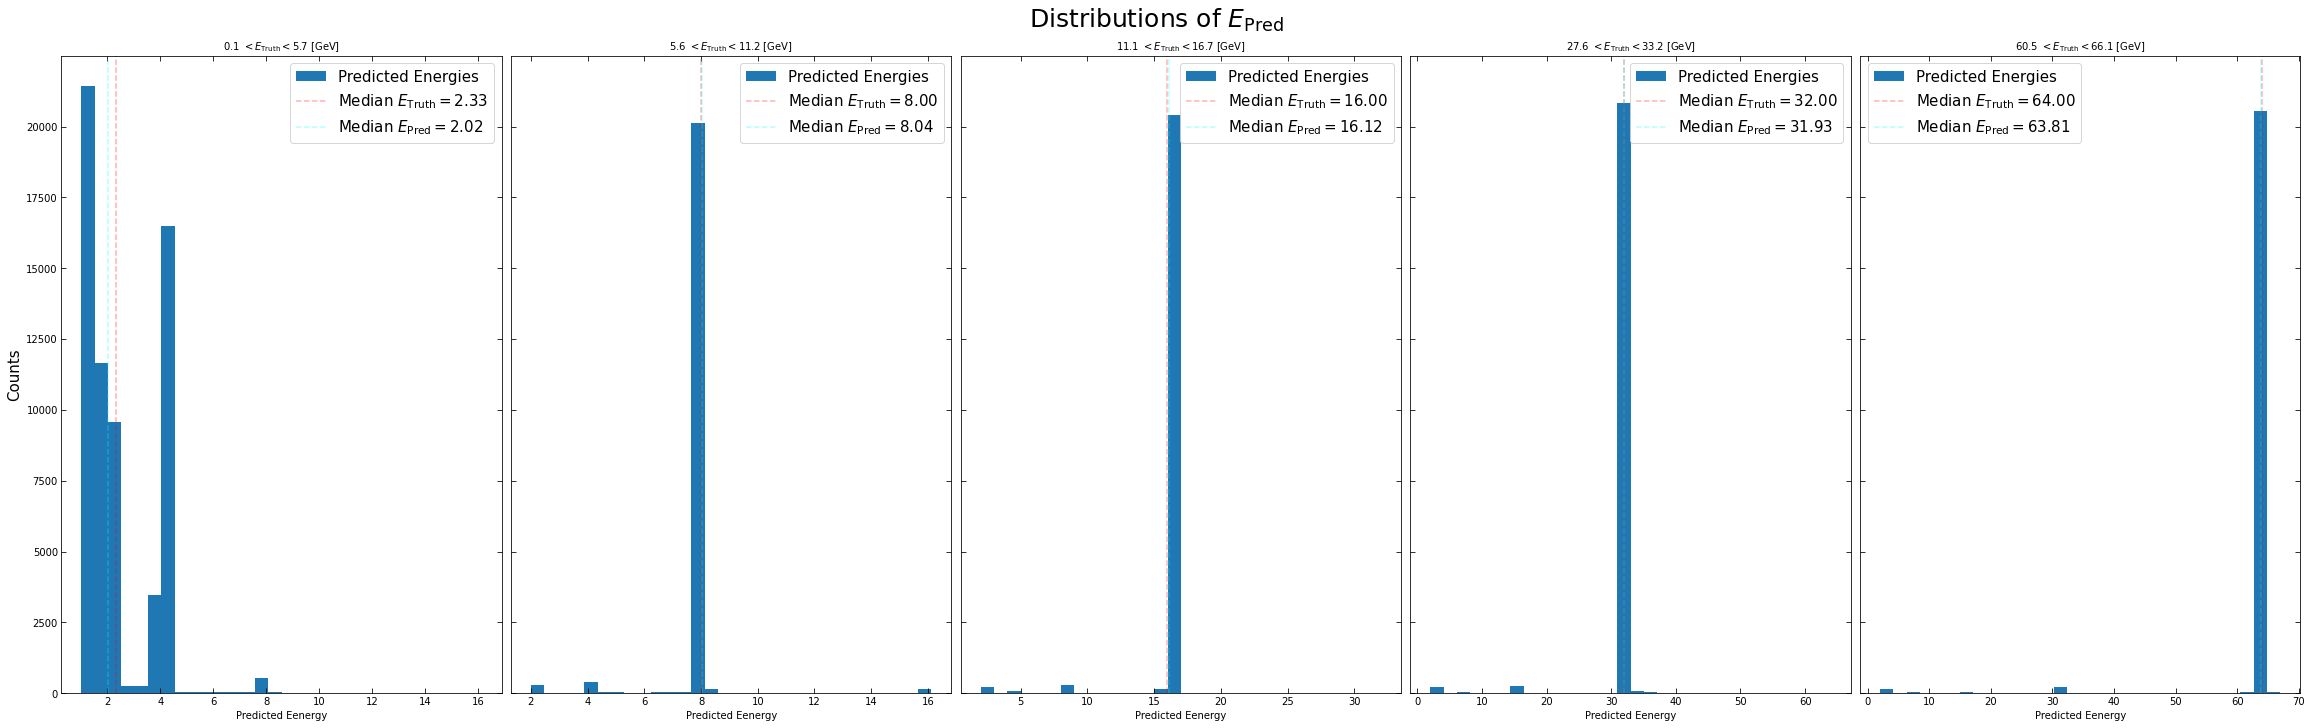

In [17]:
plot_slices(NN["slices"],NN['avg_truth'],label,Energy_Bins,"Truth",)

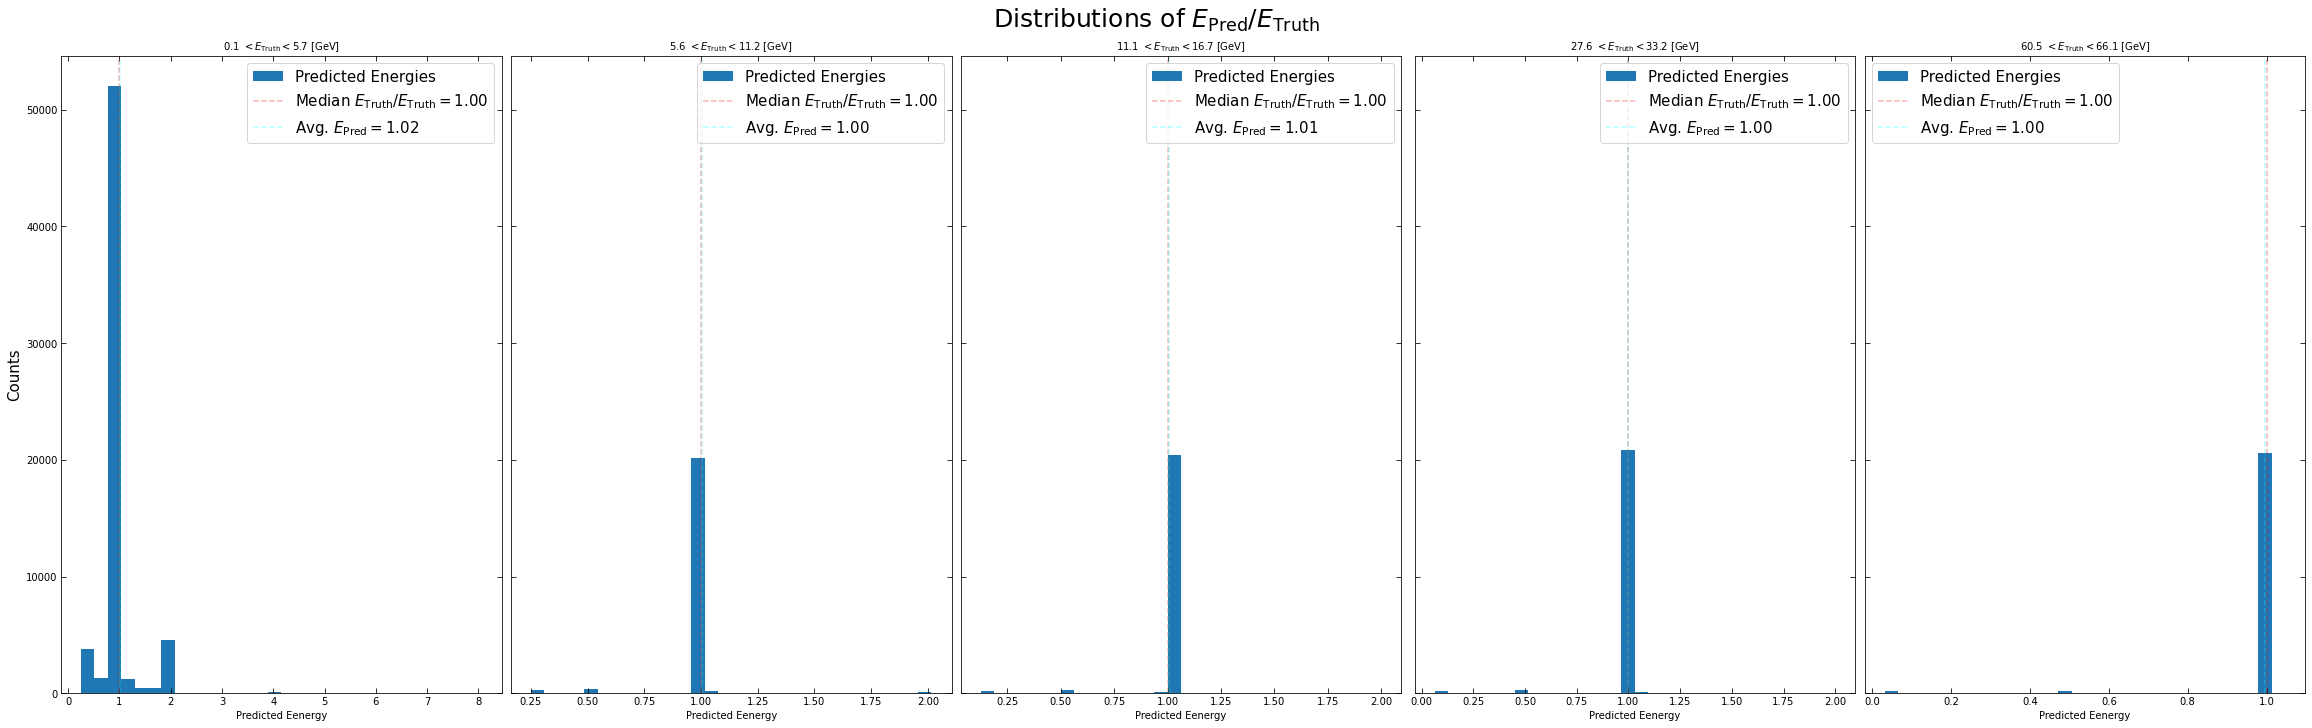

In [18]:
plot_slices(NN["scale_array"],NN['avg_truth'],label, Energy_Bins,"Truth",scale=True)